# Practical Machine Learning 
## Cosmic Object Classification

# Define the problem domain


Which features are most useful when determining the type of a luminescent cosmic object (i.e. stars, galaxies or quasi-stellar objects (QSO)) and how accurate can the prediction be?

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Generate a descriptive statistics report for the columns in your dataset

In [ ]:
# load data
url = "https://raw.githubusercontent.com/Charoula-Kyriakides/DFE/main/star_classification.csv"
stars = pd.read_csv(url) 
stars.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
stars.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
stars.isna().sum()
# Very few NaN. They could be filled in, but losing 3 - 8 rows would be insignificant.

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
stars = stars.dropna()

In [ ]:
stars['class'].unique()
# The column "class" is the target and it can has three values. So the model must be multi-class.

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

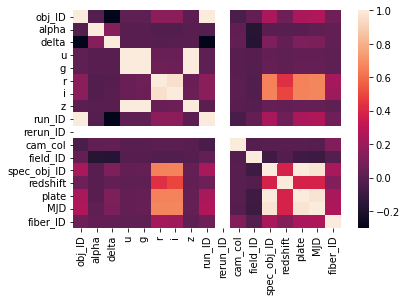

In [ ]:
corr = stars.corr()
sns.heatmap(corr)

**Note**: Columns u, g, r i and z highly correlated with eachother, 
as well as weakly correlated with redshift, plate, MJD. 
It may seem strange at first that there's any correlation with spec_obj_ID.
However this ID is indirectly related to the class as it is as stated in the source:
spec_obj_ID = Unique ID used for optical spectroscopic objects
(this means that 2 different observations with the same spec_obj_ID must share the output class).

In [ ]:
stars['rerun_ID'].unique()  # drop rerun_ID as it is constant

array([301])

In [ ]:
stars.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


obj_ID         8.438560e+12
alpha          9.650224e+01
delta          1.964467e+01
u              3.176929e+01
g              3.175029e+01
r              1.854760e+00
i              1.757895e+00
z              3.172815e+01
run_ID         1.964765e+03
rerun_ID       0.000000e+00
cam_col        1.586912e+00
field_ID       1.490111e+02
spec_obj_ID    3.324016e+18
redshift       7.307073e-01
plate          2.952303e+03
MJD            1.808484e+03
fiber_ID       2.724984e+02
dtype: float64

# Part 2: Data Preparation

Anything with the 'ID' in its column name has a very high standard deviation (or 0 for rerun_ID), which makes sense as they're not measurements. This is the same with 'plate' as the full description shows that it is also an ID, which identifies each plate in SDSS.
Understandably these can be dropped as they are not useful data in this case.

MJD stands for Modified Julian Date, indicates when a given piece of SDSS data was taken. This will also not be used for modelling. 

In [ ]:
id_cols = []
for col in stars.columns:
  if 'ID' in col:
    id_cols.append(col)
id_cols = id_cols + ['plate', 'MJD']

print(id_cols)

['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID', 'plate', 'MJD']


In [ ]:
stars.drop(columns=id_cols, inplace=True)

# Normalise and split data for training

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


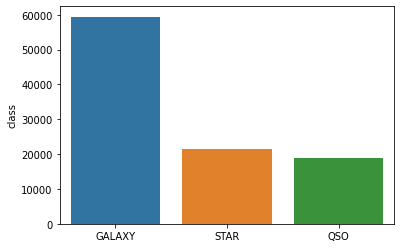

In [ ]:
# distribution
class_counts = stars['class'].value_counts()
class_names = class_counts.index
sns.barplot(class_names, class_counts )

In [ ]:
# Z-Score = (data-mean)/std (-3,3)
cats = stars.drop(columns = ['class'])

x = (cats - cats.mean()) / cats.std() # Normalise x

# convert y to int values
# convert_class = lambda s : 0 if s=='GALAXY' else (1 if s=='STAR' else 2)  

y = stars['class'] 

In [ ]:
(abs(x)>3 ).sum() # Check if any values fall outside of 3 sigma

alpha          0
delta          0
u              1
g              1
r            193
i            259
z              1
cam_col        0
redshift    1836
dtype: int64

The number of redshift values which fall outside of 3 sigma is the greatest, which makes physical sense as redshift depends on movements of many objects and the proximity of other bodies.

In [ ]:
indicator =  x[abs(x) > 3 ].any(axis=1).astype(bool)
indicator.sum()

2116

In [ ]:
print ("Only {}% values are outside of 3 sigma.\nThis is a very small number and can just be dropped.".format(2116/1000))

Only 2.116% values are outside of 3 sigma.
This is a very small number and can just be dropped.


In [ ]:
x = x[-indicator]
y = y[-indicator]

# Part 3: Model Selection

As the data is labled this will require a classification model. And as the number of rows are under 100,000 it is best to try the SVM (Support Vector Machines) in order to train a model.

In [ ]:
def train_model(x, y, classifier):
  # use of 'stratify' so that the data is balanced in each set as there are significantly more samples of galaxies.
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify = y)
  
  # training
  clf = classifier()
  clf.fit(xtrain, ytrain)

  # testing
  predictions = clf.predict(xtest)

  # confusion matrix
  cm = confusion_matrix(ytest, predictions, labels=class_names, normalize = 'true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_counts.index)

  return (ytest, predictions), disp, clf

# Part 4: Model Evaluation

In [ ]:
def metrics(yy, disp):
  ytest, predictions = yy
  acc = accuracy_score(ytest, predictions)

  prc = precision_score(ytest, predictions, 
                        pos_label='positive',
                        average='micro')

  rec = recall_score(ytest, predictions,
                      pos_label='positive',
                    average='micro')
  
  metrics = f"accuracy score:  {acc:.3f}\nprecision_score: {prc:.3f}\nrecall_score: {rec:.3f}"

  print(metrics)
  return disp.plot()

In [ ]:
yy, disp, clf = train_model(x_reduced, y, svm.SVC)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


accuracy score:  0.963
precision_score: 0.963
recall_score: 0.963


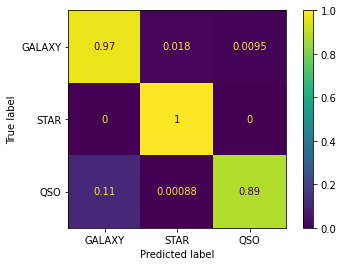

In [ ]:
metrics(yy, disp)

Fairly good scores. 
Improvements may be made by either collecting more data for QSO instances, as its true positives are the lowest at .89.
However, the data could forced to be more balanced by using several techniques,even though the differences in number of instances between the classes is not enormous and there is significant number of data for each class.
This is to determine if QSO idenfification improves, as this could be a fundemental difficulty with indetifiying QSOs due to their 'quasi' nature.
Furthermore, if QSO was removed completely, it could be that the remaining classifications would have a much higher accuracy, however, this may not be useful when dealing with the actual raw data, where all 3 types of objects are present.